# Insights Into the Relationship of Aircraft Arrival Time and Weather Data Using Deep Learning

In [ ]:
import pandas as pd
import numpy as np
import time

In [ ]:
# Mount google drive to set up file data location
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Reviewing the Data

In [ ]:
review_df = pd.read_csv('/content/drive/My Drive/UOL_APR24/FYP/data/ONTIME_REPORTING_01.csv')
review_df.shape

(583985, 33)

In [ ]:
review_df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 32
0,1,6,7,9E,N8694A,3280,10397,ATL,"Atlanta, GA",11150,...,47.0,37.0,83.0,1,NaN,NaN,NaN,NaN,NaN,NaN
1,1,7,1,9E,N8970D,3280,10397,ATL,"Atlanta, GA",11150,...,47.0,32.0,83.0,1,NaN,NaN,NaN,NaN,NaN,NaN
2,1,8,2,9E,N820AY,3280,10397,ATL,"Atlanta, GA",11150,...,47.0,39.0,83.0,1,NaN,NaN,NaN,NaN,NaN,NaN
3,1,9,3,9E,N840AY,3280,10397,ATL,"Atlanta, GA",11150,...,47.0,37.0,83.0,1,NaN,NaN,NaN,NaN,NaN,NaN
4,1,10,4,9E,N8969A,3280,10397,ATL,"Atlanta, GA",11150,...,47.0,41.0,83.0,1,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# View the statistics of our data
review_df.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,DEP_DEL15,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 32
count,583985.0,583985.000000,583985.000000,583985.000000,583985.000000,583985.000000,583985.000000,567633.000000,567630.000000,567630.000000,...,583851.000000,565963.000000,583985.000000,583985.000000,105222.000000,105222.000000,105222.000000,105222.000000,105222.000000,0.0
mean,1.0,15.960088,3.835626,2537.869334,12659.701982,12659.470015,1326.266642,1331.957814,13.258226,0.174281,...,143.557401,138.610077,797.742767,3.664861,20.106080,4.428551,18.508392,0.079508,24.950590,NaN
std,0.0,8.987942,1.921899,1821.736145,1519.405493,1519.336466,484.081000,495.404020,47.507390,0.379351,...,73.216303,73.078565,589.999261,2.323890,65.762202,38.535323,41.726392,3.203342,50.851973,NaN
min,1.0,1.000000,1.000000,1.000000,10135.000000,10135.000000,1.000000,1.000000,0.000000,0.000000,...,20.000000,16.000000,31.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,1.0,8.000000,2.000000,979.000000,11292.000000,11292.000000,917.000000,921.000000,0.000000,0.000000,...,90.000000,85.000000,363.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,1.0,16.000000,4.000000,2114.000000,12889.000000,12889.000000,1320.000000,1328.000000,0.000000,0.000000,...,125.000000,121.000000,640.000000,3.000000,0.000000,0.000000,5.000000,0.000000,0.000000,NaN
75%,1.0,24.000000,5.000000,3902.000000,13931.000000,13931.000000,1730.000000,1738.000000,5.000000,0.000000,...,175.000000,170.000000,1037.000000,5.000000,16.000000,0.000000,21.000000,0.000000,29.000000,NaN
max,1.0,31.000000,7.000000,7439.000000,16218.000000,16218.000000,2359.000000,2400.000000,1651.000000,1.000000,...,703.000000,737.000000,4983.000000,11.000000,1638.000000,1416.000000,1447.000000,816.000000,1514.000000,NaN


In [ ]:
# Check for missing data
review_df.isna().sum()

,0
MONTH,0
DAY_OF_MONTH,0
DAY_OF_WEEK,0
OP_UNIQUE_CARRIER,0
TAIL_NUM,2543
OP_CARRIER_FL_NUM,0
ORIGIN_AIRPORT_ID,0
ORIGIN,0
ORIGIN_CITY_NAME,0
DEST_AIRPORT_ID,0


# Data Preperation

## Loading the Data

**T3_AIR_CARRIER_SUMMARY_AIRPORT_ACTIVITY_2019**

This file provides information on the number of departures and passengers by airport and carrier

In [ ]:
departure_and_passengers = pd.read_csv('/content/drive/My Drive/UOL_APR24/FYP/data/T3_AIR_CARRIER_SUMMARY_AIRPORT_ACTIVITY_2019.csv')
departure_and_passengers

,OP_UNIQUE_CARRIER,CARRIER_NAME,ORIGIN_AIRPORT_ID,SERVICE_CLASS,REV_ACRFT_DEP_PERF_510,REV_PAX_ENP_110
0,04Q,Tradewind Aviation,15024,K,10.0,39.0
1,04Q,Tradewind Aviation,14843,K,677.0,3649.0
2,04Q,Tradewind Aviation,10257,V,4.0,6.0
3,04Q,Tradewind Aviation,15323,V,1.0,3.0
4,04Q,Tradewind Aviation,10158,V,1.0,2.0
...,...,...,...,...,...,...
27247,ZW,Air Wisconsin Airlines Corp,11637,K,122.0,4535.0
27248,ZW,Air Wisconsin Airlines Corp,11721,K,143.0,5800.0
27249,ZW,Air Wisconsin Airlines Corp,10469,K,248.0,8901.0
27250,ZW,Air Wisconsin Airlines Corp,12884,K,187.0,7923.0


**AIRPORT_COORDINATES.csv**

Information about the coordinates of the different airports

In [ ]:
# showing the coordinates of the airports
airport_coord = pd.read_csv('/content/drive/My Drive/UOL_APR24/FYP/data/AIRPORT_COORDINATES.csv')

airport_coord.drop_duplicates(subset='ORIGIN_AIRPORT_ID', inplace=True)
airport_coord

,ORIGIN_AIRPORT_ID,DISPLAY_AIRPORT_NAME,LATITUDE,LONGITUDE
0,10001,Afognak Lake Airport,58.109444,-152.906667
1,10003,Bear Creek Mining Strip,65.548056,-161.071667
2,10004,Lik Mining Camp,68.083333,-163.166667
3,10005,Little Squaw Airport,67.570000,-148.183889
4,10006,Kizhuyak Bay,57.745278,-152.882778
...,...,...,...,...
18128,16908,Deer Park Airport,47.966944,-117.428611
18129,16909,South Texas International at Edinburg,26.441667,-98.122222
18130,16910,Louisa County Freeman Field,38.009722,-77.970000
18131,16911,Caldwell Industrial,43.641944,-116.635833


**B43_AIRCRAFT_INVENTORY.csv**

This provides information about the specifications of the aircraft, namely, the date of manufecture, it's tail number and the number of seats of that specific aircraft

In [ ]:
# Displaying the data of manufecture, tail number and number of seats
aircraft_specs = pd.read_csv('/content/drive/My Drive/UOL_APR24/FYP/data/B43_AIRCRAFT_INVENTORY.csv',encoding='latin1')
aircraft_specs.drop_duplicates(subset='TAIL_NUM', inplace=True)
aircraft_specs

,MANUFACTURE_YEAR,TAIL_NUM,NUMBER_OF_SEATS
0,1944,N54514,0.0
1,1945,N1651M,0.0
2,1953,N100CE,0.0
3,1953,N141FL,0.0
4,1953,N151FL,0.0
...,...,...,...
7378,2019,N14011,337.0
7379,2019,N16008,337.0
7380,2019,N16009,337.0
7381,2019,N2250U,276.0


**CARRIER_DECODE.csv**

This is a lookup table for airline codes to match the main On-Time Reports

In [ ]:
# airline carrier names
carrier_names = pd.read_csv('/content/drive/My Drive/UOL_APR24/FYP/data/CARRIER_DECODE.csv')
carrier_names.drop_duplicates(inplace=True)
carrier_names.drop_duplicates(subset=['OP_UNIQUE_CARRIER'], inplace=True)
carrier_names

,AIRLINE_ID,OP_UNIQUE_CARRIER,CARRIER_NAME
0,21754,2PQ,21 Air LLC
3,20342,Q5,40-Mile Air
4,20342,WRB,40-Mile Air
6,19627,CIQ,A/S Conair
7,19072,AAE,AAA Airlines
...,...,...,...
2702,20379,ZKQ,Zantop International
2706,19771,ZAQ,Zas Airline Of Egypt
2707,21118,37,Zeal 320
2708,22069,ZG,ZIPAIR Tokyo Inc.


# Weather Data

## Cleaning and Merging Weather Data

In [ ]:
# Weather data of airports in the US
weather_data = pd.read_csv('/content/drive/My Drive/UOL_APR24/FYP/data/airport_weather_2019.csv')
weather_data

,STATION,NAME,DATE,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,...,WT08,WT09,WESD,WT10,PSUN,TSUN,SN32,SX32,TOBS,WT11
0,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,1/1/2019,4.70,NaN,0.14,0.0,0.0,64.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,1/2/2019,4.92,NaN,0.57,0.0,0.0,56.0,59.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,1/3/2019,5.37,NaN,0.15,0.0,0.0,52.0,55.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,1/4/2019,12.08,NaN,1.44,0.0,0.0,56.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,1/5/2019,13.42,NaN,0.00,0.0,0.0,49.0,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38670,USW00093805,"TALLAHASSEE REGIONAL AIRPORT, FL US",2019-12-27,6.04,NaN,0.00,NaN,NaN,68.0,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38671,USW00093805,"TALLAHASSEE REGIONAL AIRPORT, FL US",2019-12-28,5.37,NaN,0.06,NaN,NaN,69.0,74.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38672,USW00093805,"TALLAHASSEE REGIONAL AIRPORT, FL US",2019-12-29,7.61,NaN,0.10,NaN,NaN,70.0,74.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38673,USW00093805,"TALLAHASSEE REGIONAL AIRPORT, FL US",2019-12-30,5.82,NaN,0.02,NaN,NaN,68.0,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Airports to match their city names

In [ ]:
# list of cities including thier airports to match the main data frame
airport_cities = pd.read_csv('/content/drive/My Drive/UOL_APR24/FYP/data/airports_list.csv')
airport_cities

,ORIGIN_AIRPORT_ID,DISPLAY_AIRPORT_NAME,ORIGIN_CITY_NAME,NAME
0,12992,Adams Field,"Little Rock, AR","NORTH LITTLE ROCK AIRPORT, AR US"
1,10257,Albany International,"Albany, NY","ALBANY INTERNATIONAL AIRPORT, NY US"
2,10140,Albuquerque International Sunport,"Albuquerque, NM","ALBUQUERQUE INTERNATIONAL AIRPORT, NM US"
3,10299,Anchorage International,"Anchorage, AK","ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT, A..."
4,10397,Atlanta Municipal,"Atlanta, GA",ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...
...,...,...,...,...
92,15370,Tulsa International,"Tulsa, OK","OKLAHOMA CITY WILL ROGERS WORLD AIRPORT, OK US"
93,12264,Washington Dulles International,"Washington, DC","WASHINGTON DULLES INTERNATIONAL AIRPORT, VA US"
94,13851,Will Rogers World,"Oklahoma City, OK","OKLAHOMA CITY WILL ROGERS WORLD AIRPORT, OK US"
95,12191,William P Hobby,"Houston, TX","HOUSTON WILLIAM P HOBBY AIRPORT, TX US"


Merge weather data to the city names

In [ ]:
# Connect our weather report with the city names
weatherData_merge = pd.merge(airport_cities, weather_data, how='left', on='NAME')
weatherData_merge

,ORIGIN_AIRPORT_ID,DISPLAY_AIRPORT_NAME,ORIGIN_CITY_NAME,NAME,STATION,DATE,AWND,PGTM,PRCP,SNOW,...,WT08,WT09,WESD,WT10,PSUN,TSUN,SN32,SX32,TOBS,WT11
0,12992,Adams Field,"Little Rock, AR","NORTH LITTLE ROCK AIRPORT, AR US",USW00003952,2019-01-01,4.70,NaN,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12992,Adams Field,"Little Rock, AR","NORTH LITTLE ROCK AIRPORT, AR US",USW00003952,2019-01-02,2.01,NaN,0.39,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12992,Adams Field,"Little Rock, AR","NORTH LITTLE ROCK AIRPORT, AR US",USW00003952,2019-01-03,6.26,NaN,0.44,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12992,Adams Field,"Little Rock, AR","NORTH LITTLE ROCK AIRPORT, AR US",USW00003952,2019-01-04,2.01,NaN,0.13,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12992,Adams Field,"Little Rock, AR","NORTH LITTLE ROCK AIRPORT, AR US",USW00003952,2019-01-05,1.79,NaN,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35020,10713,Boise Air Terminal,"Boise, ID","BOISE AIR TERMINAL, ID US",USW00024131,2019-12-27,5.82,NaN,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35021,10713,Boise Air Terminal,"Boise, ID","BOISE AIR TERMINAL, ID US",USW00024131,2019-12-28,2.24,NaN,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35022,10713,Boise Air Terminal,"Boise, ID","BOISE AIR TERMINAL, ID US",USW00024131,2019-12-29,6.26,NaN,0.04,0.1,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35023,10713,Boise Air Terminal,"Boise, ID","BOISE AIR TERMINAL, ID US",USW00024131,2019-12-30,2.46,NaN,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Focused metrics (date, precipitation, snow, temp(avg, max, min), wind)
weather = weatherData_merge[['DATE', 'PRCP', 'SNOW', 'SNWD', 'TAVG','TMAX', 'TMIN', 'AWND', 'ORIGIN_AIRPORT_ID']]

In [ ]:
# Drop rows where no weather was recorded
#weather.drop(weather.loc[weather['ORIGIN_AIRPORT_ID'].isna()].index, axis=0, inplace=True)

# Make a copy of the weather DataFrame
weather_filtered = weather.copy()

# Drop rows where 'ORIGIN_AIRPORT_ID' is NaN
weather_filtered.drop(weather.loc[weather['ORIGIN_AIRPORT_ID'].isna()].index, axis=0, inplace=True)
weather_filtered

,DATE,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,AWND,ORIGIN_AIRPORT_ID
0,2019-01-01,0.00,0.0,0.0,NaN,45.0,39.0,4.70,12992
1,2019-01-02,0.39,0.0,0.0,NaN,39.0,36.0,2.01,12992
2,2019-01-03,0.44,0.0,0.0,NaN,41.0,37.0,6.26,12992
3,2019-01-04,0.13,0.0,0.0,NaN,47.0,37.0,2.01,12992
4,2019-01-05,0.00,0.0,0.0,NaN,62.0,37.0,1.79,12992
...,...,...,...,...,...,...,...,...,...
35020,2019-12-27,0.00,0.0,0.0,32.0,35.0,26.0,5.82,10713
35021,2019-12-28,0.00,0.0,0.0,29.0,39.0,24.0,2.24,10713
35022,2019-12-29,0.04,0.1,0.0,31.0,32.0,28.0,6.26,10713
35023,2019-12-30,0.00,0.0,0.0,31.0,34.0,29.0,2.46,10713


In [ ]:
# Look for null values in temperature
weather_filtered.loc[weather['TMAX'].isna()]
weather_filtered.loc[weather['TMIN'].isna()]
weather_filtered.loc[weather['TAVG'].isna()]

,DATE,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,AWND,ORIGIN_AIRPORT_ID
0,2019-01-01,0.00,0.0,0.0,NaN,45.0,39.0,4.70,12992
1,2019-01-02,0.39,0.0,0.0,NaN,39.0,36.0,2.01,12992
2,2019-01-03,0.44,0.0,0.0,NaN,41.0,37.0,6.26,12992
3,2019-01-04,0.13,0.0,0.0,NaN,47.0,37.0,2.01,12992
4,2019-01-05,0.00,0.0,0.0,NaN,62.0,37.0,1.79,12992
...,...,...,...,...,...,...,...,...,...
32465,2019-12-27,0.00,NaN,NaN,NaN,50.0,34.0,6.93,14307
32466,2019-12-28,0.00,NaN,NaN,NaN,50.0,35.0,7.38,14307
32467,2019-12-29,0.07,NaN,NaN,NaN,44.0,35.0,4.47,14307
32468,2019-12-30,0.97,NaN,NaN,NaN,40.0,37.0,13.20,14307


In [ ]:
# Impute mean in nan rows for temp and wind
weather_filtered['TMAX'].fillna(round(weather_filtered.groupby('ORIGIN_AIRPORT_ID')['TMAX'].transform('mean'), 1), inplace=True)
weather_filtered['TMIN'].fillna(round(weather_filtered.groupby('ORIGIN_AIRPORT_ID')['TMAX'].transform('mean'), 1), inplace=True)
weather_filtered['TAVG'].fillna(round(weather_filtered.groupby('ORIGIN_AIRPORT_ID')['TMAX'].transform('mean'), 1), inplace=True)
weather_filtered['AWND'].fillna(round(weather_filtered.groupby('ORIGIN_AIRPORT_ID')['AWND'].transform('mean'), 1), inplace=True)
weather_filtered.fillna(0, inplace=True)

In [ ]:
# Check no NaN remain
weather_filtered.isna().sum()

,0
DATE,0
PRCP,0
SNOW,0
SNWD,0
TAVG,0
TMAX,0
TMIN,0
AWND,0
ORIGIN_AIRPORT_ID,0


In [ ]:
# Convert DATE to datetime, with errors coerced to NaT
weather_filtered['DATE'] = pd.to_datetime(weather_filtered['DATE'], errors='coerce', infer_datetime_format=True)

# Extract month and day of month where DATE is not NaT
weather_filtered['MONTH'] = weather_filtered['DATE'].dt.month
weather_filtered['DAY_OF_MONTH'] = weather_filtered['DATE'].dt.day

# Handle NaT values if necessary
weather_filtered.fillna({'MONTH': -1, 'DAY_OF_MONTH': -1}, inplace=True)

weather_filtered

<ipython-input-20-c09790c74e0c>:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  weather_filtered['DATE'] = pd.to_datetime(weather_filtered['DATE'], errors='coerce', infer_datetime_format=True)


,DATE,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,AWND,ORIGIN_AIRPORT_ID,MONTH,DAY_OF_MONTH
0,2019-01-01,0.00,0.0,0.0,71.0,45.0,39.0,4.70,12992,1.0,1.0
1,2019-01-02,0.39,0.0,0.0,71.0,39.0,36.0,2.01,12992,1.0,2.0
2,2019-01-03,0.44,0.0,0.0,71.0,41.0,37.0,6.26,12992,1.0,3.0
3,2019-01-04,0.13,0.0,0.0,71.0,47.0,37.0,2.01,12992,1.0,4.0
4,2019-01-05,0.00,0.0,0.0,71.0,62.0,37.0,1.79,12992,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
35020,2019-12-27,0.00,0.0,0.0,32.0,35.0,26.0,5.82,10713,12.0,27.0
35021,2019-12-28,0.00,0.0,0.0,29.0,39.0,24.0,2.24,10713,12.0,28.0
35022,2019-12-29,0.04,0.1,0.0,31.0,32.0,28.0,6.26,10713,12.0,29.0
35023,2019-12-30,0.00,0.0,0.0,31.0,34.0,29.0,2.46,10713,12.0,30.0


In [ ]:
def month_cleanup(monthly_data, aircraft, coords, names, weather, passengers):

    '''Function which performs features engineering, data merges and cleanup using one month of On-Time data
    from Bureau of Transportation Services
    Parameters:
    monthly_data: month of on-time data as downloaded from BTS
    aircraft: Aircraft inventory data from BTS
    coords: Airport coordinates data from BTS
    names: Carrier names based on carrier code from BTS
    weather: Daily weather reported at airports from National Center for Environmental Information
    passengers: Yearly passenger information for carriers and airports from BTS

    returns: cleaned month of On-Time reporting
    '''

    # start the timer so we can track how long the cleaning function takes
    start = time.time()

    # CLEANING
    # drop rows with no departure time, tail number, or were cancelled
    # print("Dropping NaNs from Dep Time, Tail Num. Dropping Cancellations.")
    monthly_data.drop(monthly_data.loc[monthly_data['DEP_TIME'].isna()].index, axis=0, inplace=True)
    monthly_data.drop(monthly_data.loc[monthly_data['TAIL_NUM'].isna()].index, axis=0, inplace=True)
    monthly_data.drop(monthly_data.loc[monthly_data['CANCELLED']==1].index, axis=0, inplace=True)

    # FEATURE ENGINEERING - SEGMENT NUMBER
    # List flight segment number for daily flight segments by tracking tail number
    # print("Adding Flight Number Sequence - SEGMENT_NUMBER")
    monthly_data["SEGMENT_NUMBER"] = monthly_data.groupby(["TAIL_NUM", 'DAY_OF_MONTH'])["DEP_TIME"].rank("dense", ascending=True)

    # FEATURE ENGINEERING - CONCURRENT FLIGHTS
    # Listing the number of concurrent flights at the airport in the time block
    # print("Adding Concurrent Flights - CONCURRENT_FLIGHTS")
    monthly_data['CONCURRENT_FLIGHTS'] = monthly_data.groupby(['ORIGIN_AIRPORT_ID','DAY_OF_MONTH', 'DEP_TIME_BLK'])['OP_UNIQUE_CARRIER'].transform("count")

    # MERGING to get NUMBER_OF_SEATS
    # print("Applying seat counts to flights - NUMBER_OF_SEATS")
    # Merge aircraft info with main frame on tail number - get NUMBER_OF_SEATS
    monthly_data = pd.merge(monthly_data, aircraft, how="left", on='TAIL_NUM')
    # Fill missing aircraft info with means
    monthly_data['NUMBER_OF_SEATS'].fillna((monthly_data['NUMBER_OF_SEATS'].mean()), inplace=True)
    # simplify data type of number of seats to reduce memory usage
    monthly_data['NUMBER_OF_SEATS'] = monthly_data['NUMBER_OF_SEATS'].astype('int16')

    # MERGING
    # Merge to get proper carrier name
    # print("Applying Carrier Names - CARRIER_NAME")
    monthly_data = pd.merge(monthly_data, names, how='left', on=['OP_UNIQUE_CARRIER'])

    # FEATURE ENGINEERING - AIRPORT_FLIGHTS_MONTH, AIRLINE_FLIGHTS_MONTH, AIRLINE_AIRPORT_FLIGHTS_MONTH
    # Add monthly flight statistics for carrier and airport
    # print("Adding flight statistics for carrier and airport - AIRPORT_FLIGHTS_MONTH, AIRLINE_FLIGHTS_MONTH, AIRLINE_AIRPORT_FLIGHTS_MONTH")
    monthly_data['AIRPORT_FLIGHTS_MONTH'] = monthly_data.groupby(['ORIGIN_AIRPORT_ID'])['ORIGIN_CITY_NAME'].transform('count')
    monthly_data['AIRLINE_FLIGHTS_MONTH'] = monthly_data.groupby(['OP_UNIQUE_CARRIER'])['ORIGIN_CITY_NAME'].transform('count')
    monthly_data['AIRLINE_AIRPORT_FLIGHTS_MONTH'] = monthly_data.groupby(['OP_UNIQUE_CARRIER', 'ORIGIN_AIRPORT_ID'])['ORIGIN_CITY_NAME'].transform('count')

    # FEATURE ENGINEERING - AVG_MONTHLY_PASS_AIRPORT, AVG_MONTHLY_PASS_AIRLINE
    #Add monthly passenger statistics for carrier and airport
    # print("Adding passenger statistics for carrier and airport - AVG_MONTHLY_PASS_AIRPORT, AVG_MONTHLY_PASS_AIRLINE")
    monthly_airport_passengers = pd.DataFrame(passengers.groupby(['ORIGIN_AIRPORT_ID'])['REV_PAX_ENP_110'].sum())
    monthly_data = pd.merge(monthly_data, monthly_airport_passengers, how='left', on=['ORIGIN_AIRPORT_ID'])
    monthly_data['AVG_MONTHLY_PASS_AIRPORT'] = (monthly_data['REV_PAX_ENP_110']/12).astype('int64')
    monthly_airline_passengers = pd.DataFrame(passengers.groupby(['OP_UNIQUE_CARRIER'])['REV_PAX_ENP_110'].sum())
    monthly_data = pd.merge(monthly_data, monthly_airline_passengers, how='left', on=['OP_UNIQUE_CARRIER'])
    monthly_data['AVG_MONTHLY_PASS_AIRLINE'] = (monthly_data['REV_PAX_ENP_110_y']/12).astype('int64')

    # FEATURE ENGINEERING - PLANE AGE
    # Calculate age of plane
    # print("Calculate Fleet Age - PLANE_AGE")
    monthly_data['MANUFACTURE_YEAR'].fillna((monthly_data['MANUFACTURE_YEAR'].mean()), inplace=True)
    monthly_data['PLANE_AGE'] = 2019 - monthly_data['MANUFACTURE_YEAR']

    # MERGING
    # Merge to get airport coordinates
    # print("Adding airport coordinates - LATITUDE, LONGITUDE, DEPARTING_AIRPORT")
    monthly_data = pd.merge(monthly_data, coords, how='left', on=['ORIGIN_AIRPORT_ID'])
    monthly_data['LATITUDE'] = round(monthly_data['LATITUDE'], 3)
    monthly_data['LONGITUDE'] = round(monthly_data['LONGITUDE'], 3)

    # FEATURE ENGINEERING - PREVIOUS AIRPORT
    # Get previous airport for tail number
    # print("Adding airports - PREVIOUS_AIRPORT")
    segment_temp = monthly_data[['DAY_OF_MONTH', 'TAIL_NUM', 'DISPLAY_AIRPORT_NAME', 'SEGMENT_NUMBER']]
    monthly_data = pd.merge_asof(monthly_data.sort_values('SEGMENT_NUMBER'), segment_temp.sort_values('SEGMENT_NUMBER'), on='SEGMENT_NUMBER', by=['DAY_OF_MONTH', 'TAIL_NUM'], allow_exact_matches=False)
    monthly_data['DISPLAY_AIRPORT_NAME_y'].fillna('NONE', inplace=True)
    monthly_data.rename(columns={"DISPLAY_AIRPORT_NAME_y": "PREVIOUS_AIRPORT", "DISPLAY_AIRPORT_NAME_x": "DEPARTING_AIRPORT"}, inplace=True)

    # CLEANING
    # Drop airports below the 10th percentile
    # print("Dropping bottom 10% of airports")
    monthly_data.drop(monthly_data.loc[monthly_data['AIRPORT_FLIGHTS_MONTH'] < 1100].index, axis=0, inplace=True)

    # MERGING
    # Merge weather data
    # print("Adding daily weather data - PRCP, SNOW, SNWD, SMAX, TAVG, TMAX, TMIN, AWND")
    monthly_data = pd.merge(monthly_data, weather, how='inner', on=['ORIGIN_AIRPORT_ID', 'MONTH', 'DAY_OF_MONTH'])


    # CLEANING
    # drop columns that we won't use
    # print("Clean up unneeded columns")
    monthly_data.drop(columns = ['OP_UNIQUE_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
                 'ORIGIN_AIRPORT_ID', 'ORIGIN', 'ORIGIN_CITY_NAME', 'DEST_AIRPORT_ID', 'DEST', 'DEST_CITY_NAME',
                 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY_NEW', 'DEP_DEL15', 'DEP_TIME_BLK',
                 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_TIME_BLK',
                 'CANCELLED', 'CANCELLATION_CODE', 'CRS_ELAPSED_TIME',
                 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',

                 'AIRLINE_ID', 'DATE', 'DAY_OF_MONTH', 'REV_PAX_ENP_110_x', 'REV_PAX_ENP_110_y', 'MANUFACTURE_YEAR',
                 'Unnamed: 32'
                 ],
                  axis=1, inplace=True)

    # CLEANING
    # specify data types of various fields to reduce memory usage
    # print("Cleaning up data types")
    monthly_data['MONTH'] = monthly_data['MONTH'].astype('object')
    monthly_data['DAY_OF_WEEK'] = monthly_data['DAY_OF_WEEK'].astype('object')
    monthly_data['SEGMENT_NUMBER'] = monthly_data['SEGMENT_NUMBER'].astype('int8')
    monthly_data['AIRPORT_FLIGHTS_MONTH'] = monthly_data['AIRPORT_FLIGHTS_MONTH'].astype('int64')
    monthly_data['AIRLINE_FLIGHTS_MONTH'] = monthly_data['AIRLINE_FLIGHTS_MONTH'].astype('int64')
    monthly_data['AIRLINE_AIRPORT_FLIGHTS_MONTH'] = monthly_data['AIRLINE_AIRPORT_FLIGHTS_MONTH'].astype('int64')
    monthly_data['PLANE_AGE'] = monthly_data['PLANE_AGE'].astype('int32')

    # reset index
    monthly_data.reset_index(inplace=True, drop=True)

    # print elapsed time
    print(f'Elapsed Time: {time.time() - start}')

    print("FINISHED")

    # return cleaned file
    return monthly_data

In [ ]:
df = pd.read_csv('/content/drive/My Drive/UOL_APR24/FYP/data/ONTIME_REPORTING_01.csv')
month01 = month_cleanup(df, aircraft_specs, airport_coord, carrier_names, weather_filtered,
                        departure_and_passengers)
df = pd.read_csv('/content/drive/My Drive/UOL_APR24/FYP/data/ONTIME_REPORTING_02.csv')
month02 = month_cleanup(df, aircraft_specs, airport_coord, carrier_names, weather_filtered,
                        departure_and_passengers)
df = pd.read_csv('/content/drive/My Drive/UOL_APR24/FYP/data/ONTIME_REPORTING_03.csv')
month03 = month_cleanup(df, aircraft_specs, airport_coord, carrier_names, weather_filtered,
                        departure_and_passengers)
df = pd.read_csv('/content/drive/My Drive/UOL_APR24/FYP/data/ONTIME_REPORTING_04.csv')
month04 = month_cleanup(df, aircraft_specs, airport_coord, carrier_names, weather_filtered,
                        departure_and_passengers)
df = pd.read_csv('/content/drive/My Drive/UOL_APR24/FYP/data/ONTIME_REPORTING_05.csv')
month05 = month_cleanup(df, aircraft_specs, airport_coord, carrier_names, weather_filtered,
                        departure_and_passengers)
df = pd.read_csv('/content/drive/My Drive/UOL_APR24/FYP/data/ONTIME_REPORTING_06.csv')
month06 = month_cleanup(df, aircraft_specs, airport_coord, carrier_names, weather_filtered,
                        departure_and_passengers)
df = pd.read_csv('/content/drive/My Drive/UOL_APR24/FYP/data/ONTIME_REPORTING_07.csv')
month07 = month_cleanup(df, aircraft_specs, airport_coord, carrier_names, weather_filtered,
                        departure_and_passengers)
df = pd.read_csv('/content/drive/My Drive/UOL_APR24/FYP/data/ONTIME_REPORTING_08.csv')
month08 = month_cleanup(df, aircraft_specs, airport_coord, carrier_names, weather_filtered,
                        departure_and_passengers)
df = pd.read_csv('/content/drive/My Drive/UOL_APR24/FYP/data/ONTIME_REPORTING_09.csv')
month09 = month_cleanup(df, aircraft_specs, airport_coord, carrier_names, weather_filtered,
                        departure_and_passengers)
df = pd.read_csv('/content/drive/My Drive/UOL_APR24/FYP/data/ONTIME_REPORTING_10.csv')
month10 = month_cleanup(df, aircraft_specs, airport_coord, carrier_names, weather_filtered,
                        departure_and_passengers)
df = pd.read_csv('/content/drive/My Drive/UOL_APR24/FYP/data/ONTIME_REPORTING_11.csv')
month11 = month_cleanup(df, aircraft_specs, airport_coord, carrier_names, weather_filtered,
                        departure_and_passengers)
df = pd.read_csv('/content/drive/My Drive/UOL_APR24/FYP/data/ONTIME_REPORTING_12.csv')
month12 = month_cleanup(df, aircraft_specs, airport_coord, carrier_names, weather_filtered,
                        departure_and_passengers)

# COMBINE MASTER FILE

all_data = pd.concat([month01, month02, month03, month04, month05, month06, month07, month08, month09, month10, month11, month12]).reset_index(drop=True)
all_data.to_pickle("/content/drive/My Drive/UOL_APR24/FYP/data/pkl/train_val.pkl")
all_data.to_csv('/content/drive/My Drive/UOL_APR24/FYP/data/train_val.csv', index=False)

Elapsed Time: 4.256192684173584
FINISHED
Elapsed Time: 3.7764949798583984
FINISHED
Elapsed Time: 4.609926700592041
FINISHED
Elapsed Time: 4.444217920303345
FINISHED
Elapsed Time: 4.587545394897461
FINISHED
Elapsed Time: 4.568156719207764
FINISHED
Elapsed Time: 4.889991760253906
FINISHED
Elapsed Time: 4.851662874221802
FINISHED
Elapsed Time: 4.370737075805664
FINISHED
Elapsed Time: 4.806635618209839
FINISHED
Elapsed Time: 4.38737678527832
FINISHED
Elapsed Time: 4.453283786773682
FINISHED


# Data Preperation for Deep Learning with Convolutional Neural Networks

In [ ]:
# Load your tabular data
data = pd.read_csv('/content/drive/My Drive/UOL_APR24/FYP/data/train_val.csv')

In [ ]:
data

In [ ]:
data.isna().sum()

In [ ]:
# Fill NaN values in specific columns with the mean of those columns
columns_to_fill = ['ARR_DELAY_NEW', 'ACTUAL_ELAPSED_TIME']

for col in columns_to_fill:
    mean_value = data[col].mean()
    data[col].fillna(mean_value, inplace=True)

# Verify that NaN values are filled
print("NaN counts after filling:")
print(data.isna().sum())

# Baseline Model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, accuracy_score, precision_score
from sklearn.pipeline import Pipeline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

Prepping Data for Baseline Model

In [ ]:
# Load your data
data = pd.read_csv('/content/drive/My Drive/UOL_APR24/FYP/data/train_val.csv')

# Fill NaN values for specific columns
columns_to_fill = ['ARR_DELAY_NEW', 'ACTUAL_ELAPSED_TIME']
for col in columns_to_fill:
    data[col].fillna(data[col].mean(), inplace=True)

# Binarize the target variable (e.g., delay vs. no delay)
delay_threshold = 15  # Define the threshold for delay
data['DELAYED'] = (data['ARR_DELAY_NEW'] > delay_threshold).astype(int)

# Define the target variable and features
target = 'DELAYED'  # Binary target variable
features = [col for col in data.columns if col not in [target, 'ARR_DELAY_NEW']]

X = data[features]
y = data[target]

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['number']).columns.tolist()

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Apply transformations to the data
X_transformed = preprocessor.fit_transform(X)

# Convert the sparse matrix to a dense array
X_transformed_dense = X_transformed.toarray()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed_dense, y, test_size=0.2, random_state=42)

# Reshape the data to fit CNN input (assuming 1D convolution)
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Check for NaN values in reshaped data
assert not np.isnan(X_train_reshaped).any(), "NaN values found in X_train_reshaped"
assert not np.isnan(X_test_reshaped).any(), "NaN values found in X_test_reshaped"

Baseline Model

In [ ]:
# Create a baseline CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Use sigmoid for binary classification

# Compile the model with classification metrics
model.compile(optimizer=Adam(learning_rate=0.001), loss=BinaryCrossentropy(), metrics=['accuracy', 'Precision'])

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy, test_precision = model.evaluate(X_test_reshaped, y_test)
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Precision: {test_precision}')

# Generate predictions
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

# Classification report
print(classification_report(y_test, y_pred, target_names=['Not Delayed', 'Delayed']))

# Summary of the model
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
19534/19534 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - Precision: 0.7359 - accuracy: 0.8555 - loss: 0.3835 - val_Precision: 0.7774 - val_accuracy: 0.8600 - val_loss: 0.3685
Epoch 2/5
19534/19534 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - Precision: 0.7666 - accuracy: 0.8612 - loss: 0.3676 - val_Precision: 0.8015 - val_accuracy: 0.8605 - val_loss: 0.3697
Epoch 3/5
19534/19534 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - Precision: 0.7664 - accuracy: 0.8616 - loss: 0.3645 - val_Precision: 0.7998 - val_accuracy: 0.8609 - val_loss: 0.3659
Epoch 4/5
19534/19534 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - Precision: 0.7696 - accuracy: 0.8628 - loss: 0.3605 - val_Precision: 0.7935 - val_accuracy: 0.8618 - val_loss: 0.3635
Epoch 5/5
19534/19534 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - Precision: 0.7656 - accuracy: 0.8621 - loss: 0.3614 - val_Precision: 0.7116 - val_accuracy: 0.8601 - val_loss: 0.3656
6105/6105 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - Precision: 0.7167 - accuracy: 0.8606 - loss: 0.3668
Test Accuracy: 0.859883

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 372, 32)             │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 11904)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         761,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,286,341 (8.72 MB)

 Trainable params: 762,113 (2.91 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,524,228 (5.81 MB)

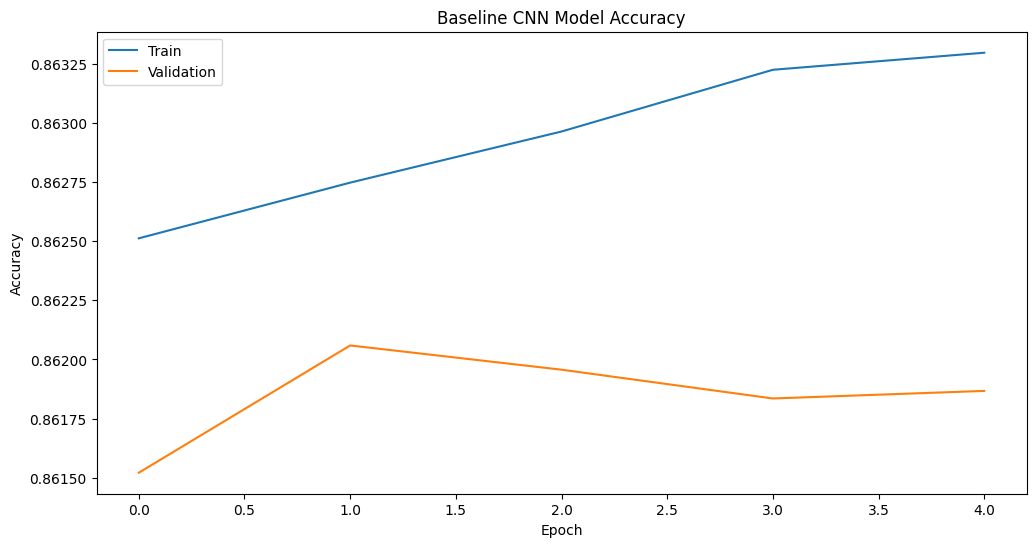

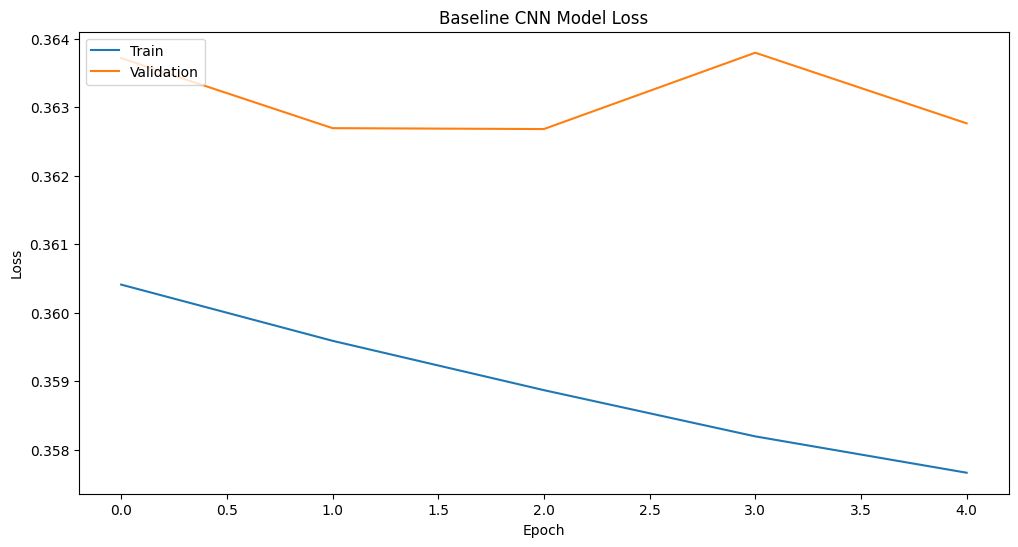

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Baseline CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Baseline CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Improvements made on baseline model

In [ ]:
%%capture
!pip install keras-tuner geopandas scikeras imblearn

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import EarlyStopping
from keras_tuner import HyperModel, RandomSearch
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from geopandas.tools import sjoin
from scikeras.wrappers import KerasClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE


In [ ]:
# Load your data
data = pd.read_csv('/content/drive/My Drive/UOL_APR24/FYP/data/train_val.csv')

# Fill NaN values for specific columns
columns_to_fill = ['ARR_DELAY_NEW', 'ACTUAL_ELAPSED_TIME']
for col in columns_to_fill:
    data[col].fillna(data[col].mean(), inplace=True)

# Binarize the target variable (delay vs. no delay)
delay_threshold = 15
data['DELAYED'] = (data['ARR_DELAY_NEW'] > delay_threshold).astype(int)

# Here, add the feature engineering for weather and interaction terms
data['DISTANCE_TMIN'] = data['DISTANCE'] * data['TMIN']
data['DISTANCE_TMAX'] = data['DISTANCE'] * data['TMAX']
data['TAVG'] = (data['TMIN'] + data['TMAX']) / 2
data['TURBULENCE_INDEX'] = (data['TMIN'] * data['TMAX']) / data['DISTANCE']
data['TEMP_VARIABILITY'] = data['TMAX'] - data['TMIN']


# Define target and features
target = 'DELAYED'
features = [col for col in data.columns if col not in [target, 'ARR_DELAY_NEW']]

X = data[features]
y = data[target]

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['number']).columns.tolist()

# Add the newly created interaction features into numerical columns
numerical_cols.extend(['DISTANCE_TMIN', 'DISTANCE_TMAX', 'TAVG', 'TURBULENCE_INDEX', 'TEMP_VARIABILITY'])

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Apply transformations to the data
X_transformed = preprocessor.fit_transform(X)

# Convert to dense array
X_transformed_dense = X_transformed.toarray()

# Balance the dataset with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_transformed_dense, y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Handle NaN values in X_train and X_test
X_train = pd.DataFrame(X_train).fillna(X_train.mean())
X_test = pd.DataFrame(X_test).fillna(X_test.mean())

# Convert back to the numpy array if required
X_train = X_train.values
X_test = X_test.values

# Reshape for CNN/LSTM
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Early Stopping Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
# Define the hypermodel for CNN
class CNNHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential()
        model.add(Conv1D(filters=hp.Int('filters', min_value=16, max_value=64, step=16),
                         kernel_size=hp.Choice('kernel_size', [3, 5]),
                         activation=hp.Choice('activation', ['relu', 'tanh']),
                         input_shape=(X_train_reshaped.shape[1], 1)))
        model.add(Dropout(rate=hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1)))
        model.add(Flatten())
        model.add(Dense(units=hp.Int('units', min_value=16, max_value=64, step=16),
                        activation=hp.Choice('activation', ['relu', 'tanh'])))
        model.add(Dropout(rate=hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1)))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer=hp.Choice('optimizer', ['adam', 'RMSprop']),
                      loss=BinaryCrossentropy(),
                      metrics=['accuracy', 'Precision'])
        return model

# Set up the tuner with RandomSearch for CNN
cnn_tuner = RandomSearch(CNNHyperModel(),
                         objective='val_accuracy',
                         max_trials=10,
                         executions_per_trial=1,
                         directory='cnn_random_search',
                         project_name='cnn_hyperparameter_tuning')

# Run the hyperparameter search for CNN
cnn_tuner.search(X_train_reshaped, y_train, epochs=5, batch_size=16, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Get the optimal hyperparameters for CNN
best_cnn_hps = cnn_tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the best CNN model
best_cnn_model = cnn_tuner.hypermodel.build(best_cnn_hps)

# Train the best CNN model
cnn_history = best_cnn_model.fit(X_train_reshaped, y_train, epochs=10, batch_size=16, validation_split=0.2, callbacks=[early_stopping], verbose=1)

In [ ]:
# Generate predictions for CNN
cnn_y_pred_probs = best_cnn_model.predict(X_test_reshaped)
cnn_y_pred = (cnn_y_pred_probs > 0.5).astype(int)

# Calculate precision for CNN
cnn_test_precision = precision_score(y_test, cnn_y_pred)
print(f'CNN Test Precision: {cnn_test_precision}')

# Classification report for CNN
print(classification_report(y_test, cnn_y_pred, target_names=['Not Delayed', 'Delayed']))

10201/10201 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step
CNN Test Precision: 0.8216721555295867
              precision    recall  f1-score   support

 Not Delayed       0.74      0.85      0.79    163007
     Delayed       0.82      0.71      0.76    163400

    accuracy                           0.78    326407
   macro avg       0.78      0.78      0.78    326407
weighted avg       0.78      0.78      0.78    326407



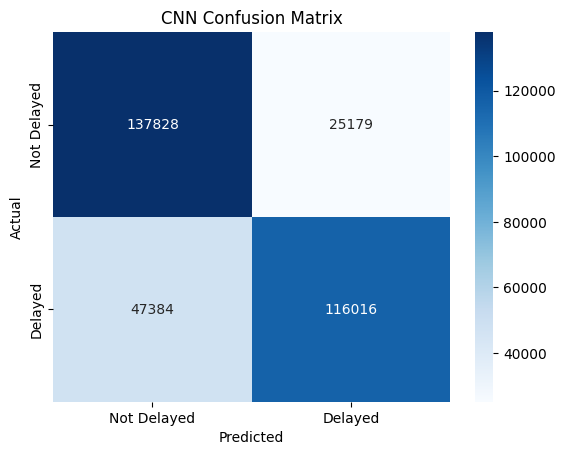

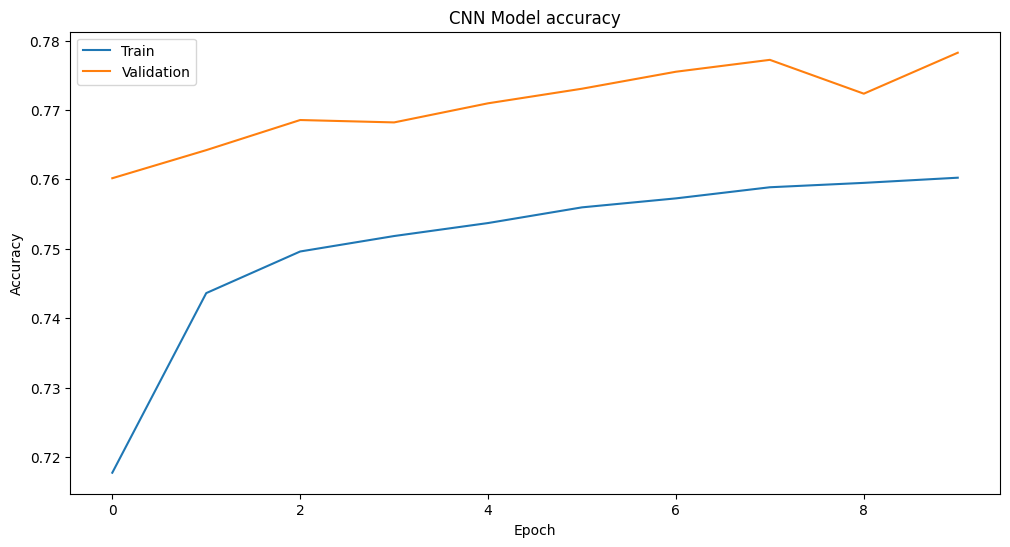

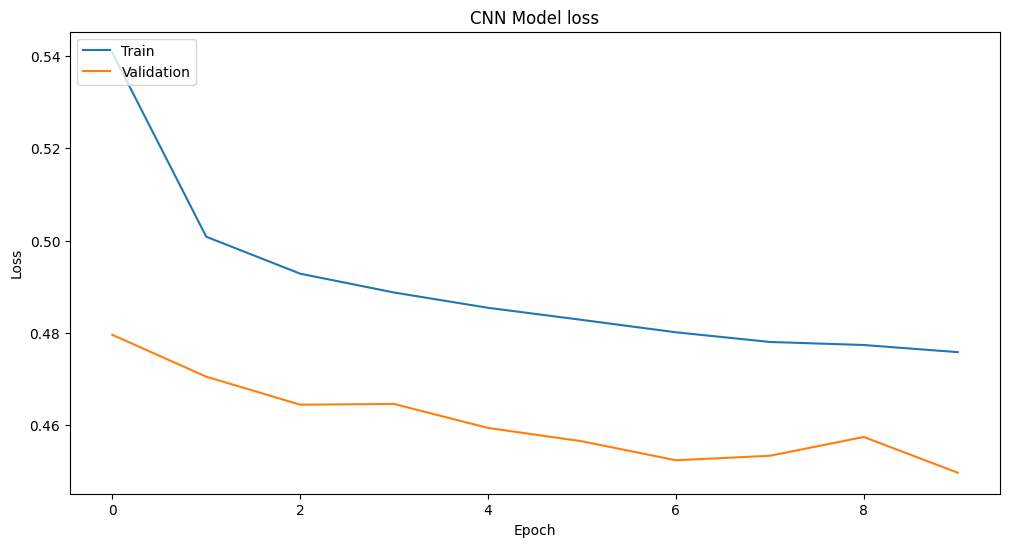

In [ ]:
# Confusion matrix for CNN
cnn_conf_matrix = confusion_matrix(y_test, cnn_y_pred)
sns.heatmap(cnn_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Delayed', 'Delayed'], yticklabels=['Not Delayed', 'Delayed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('CNN Confusion Matrix')
plt.show()

# Plot training & validation accuracy values for CNN
plt.figure(figsize=(12, 6))
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('CNN Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values for CNN
plt.figure(figsize=(12, 6))
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('CNN Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# LSTM

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, mean_squared_error, mean_absolute_error, r2_score


In [ ]:
# Define the hypermodel for LSTM
class LSTMHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential()
        model.add(LSTM(units=hp.Int('units', min_value=16, max_value=64, step=16),
                       activation=hp.Choice('activation', ['relu', 'tanh']),
                       input_shape=(X_train_reshaped.shape[1], 1)))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer=hp.Choice('optimizer', ['adam', 'RMSprop']),
                      loss=BinaryCrossentropy(),
                      metrics=['accuracy', 'Precision'])
        return model

# Set up the tuner with RandomSearch for LSTM
lstm_tuner = RandomSearch(LSTMHyperModel(),
                          objective='val_accuracy',
                          max_trials=1,
                          executions_per_trial=1,
                          directory='lstm_random_search',
                          project_name='lstm_hyperparameter_tuning')

# Run the hyperparameter search for LSTM
lstm_tuner.search(X_train_reshaped, y_train, epochs=2, batch_size=16, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Get the optimal hyperparameters for LSTM
best_lstm_hps = lstm_tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the best LSTM model
best_lstm_model = lstm_tuner.hypermodel.build(best_lstm_hps)

# Train the best LSTM model
lstm_history = best_lstm_model.fit(X_train_reshaped, y_train, epochs=2, batch_size=16, validation_split=0.2, callbacks=[early_stopping], verbose=1)

Trial 1 Complete [01h 23m 59s]
val_accuracy: 0.5003216862678528

Best val_accuracy So Far: 0.5003216862678528
Total elapsed time: 01h 23m 59s
Epoch 1/2
65282/65282 ━━━━━━━━━━━━━━━━━━━━ 2516s 39ms/step - Precision: 0.4990 - accuracy: 0.4996 - loss: 0.6932 - val_Precision: 0.4997 - val_accuracy: 0.4997 - val_loss: 0.6932
Epoch 2/2
65282/65282 ━━━━━━━━━━━━━━━━━━━━ 2508s 38ms/step - Precision: 0.4994 - accuracy: 0.5003 - loss: 0.6932 - val_Precision: 0.5000 - val_accuracy: 0.5004 - val_loss: 0.6932


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - Precision: 0.5031 - accuracy: 0.5034 - loss: 0.6931
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step


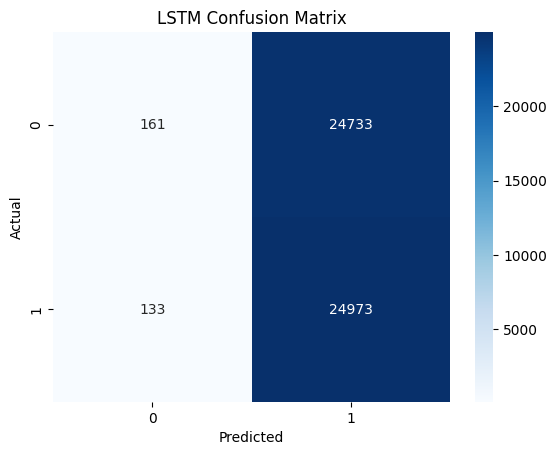

Mean Squared Error (MSE): 0.49732
Root Mean Squared Error (RMSE): 0.7052091888227209
Mean Absolute Error (MAE): 0.49732
Mean Directional Accuracy (MDA): 0.5032298357921398
R2 score: -0.9893157631230634


In [ ]:
# Sample a subset of the data
sample_size = 50000  # Adjust the sample size as needed
X_test_reshaped_sample = X_test_reshaped[:sample_size]
y_test_sample = y_test[:sample_size]


# Evaluate the models using the sampled data
lstm_test_acc = best_lstm_model.evaluate(X_test_reshaped_sample, y_test_sample)[1]

# Visualize confusion matrices
def plot_confusion_matrix(y_true, y_pred, title):
    conf_matrix = confusion_matrix(y_true, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Generate predictions using the sampled data
lstm_y_pred = (best_lstm_model.predict(X_test_reshaped_sample) > 0.5).astype(int)

# Calculate additional metrics for LSTM using the sampled data
mse = mean_squared_error(y_test_sample, lstm_y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_sample, lstm_y_pred)
r2 = r2_score(y_test_sample, lstm_y_pred)

# Calculate Mean Directional Accuracy (MDA)
def mean_directional_accuracy(y_true, y_pred):
    return np.mean((np.sign(y_true[1:] - y_true[:-1]) == np.sign(y_pred[1:] - y_pred[:-1])).astype(int))

# Calculate Mean Directional Accuracy (MDA)
mda = mean_directional_accuracy(y_test_sample.to_numpy(), lstm_y_pred)

# Plot confusion matrix using the sampled data
plot_confusion_matrix(y_test_sample, lstm_y_pred, 'LSTM Confusion Matrix')

# Print the additional metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Directional Accuracy (MDA): {mda}')
print(f'R2 score: {r2}')


# Ensemble Model (Stacking)

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Ensemble Test Accuracy: 0.4993979908519119


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Ensemble Test Precision: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

 Not Delayed       0.50      1.00      0.67    163007
     Delayed       0.00      0.00      0.00    163400

    accuracy                           0.50    326407
   macro avg       0.25      0.50      0.33    326407
weighted avg       0.25      0.50      0.33    326407



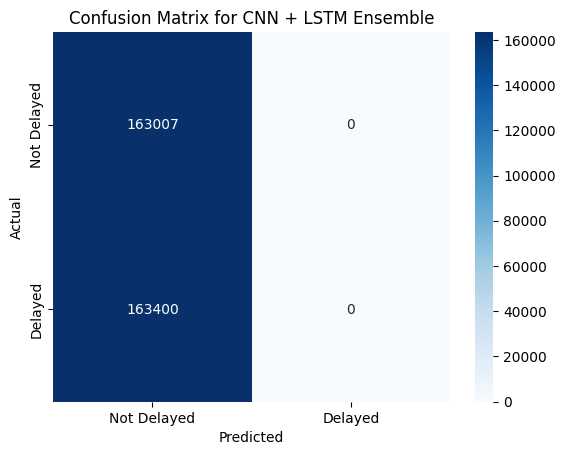

In [ ]:
# Custom ensemble model that averages the predictions of CNN and LSTM
class CNNLSTMEnsemble(BaseEstimator, ClassifierMixin):
    def __init__(self, cnn_model, lstm_model):
        self.cnn_model = cnn_model
        self.lstm_model = lstm_model

    def fit(self, X, y):
        # Fit both CNN and LSTM models
        self.cnn_model.fit(X, y)
        self.lstm_model.fit(X, y)
        return self

    def predict(self, X):
        # Predict using both models
        cnn_pred = self.cnn_model.predict(X)
        lstm_pred = self.lstm_model.predict(X)

        # Average the predictions
        avg_pred = (cnn_pred + lstm_pred) / 2.0

        # Convert to binary prediction
        final_pred = (avg_pred > 0.5).astype(int)
        return final_pred

    def predict_proba(self, X):
        # Predict probabilities using both models
        cnn_pred_proba = self.cnn_model.predict_proba(X)
        lstm_pred_proba = self.lstm_model.predict_proba(X)

        # Average the probabilities
        avg_pred_proba = (cnn_pred_proba + lstm_pred_proba) / 2.0
        return avg_pred_proba

# Define the basic CNN model
def create_cnn_model():
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define the basic LSTM model
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrapping the models with KerasClassifier to integrate with scikit-learn
cnn_model = KerasClassifier(model=create_cnn_model, epochs=10, batch_size=32, verbose=0)
lstm_model = KerasClassifier(model=create_lstm_model, epochs=10, batch_size=32, verbose=0)

# Instantiate the custom ensemble model
ensemble_model = CNNLSTMEnsemble(cnn_model, lstm_model)

# Train the ensemble model
ensemble_model.fit(X_train_reshaped, y_train)

# Evaluate the ensemble model
ensemble_test_accuracy = ensemble_model.score(X_test_reshaped, y_test)
print(f'Ensemble Test Accuracy: {ensemble_test_accuracy}')

# Generate predictions for ensemble model
ensemble_y_pred = ensemble_model.predict(X_test_reshaped)

# Calculate precision for ensemble model
ensemble_test_precision = precision_score(y_test, ensemble_y_pred)
print(f'Ensemble Test Precision: {ensemble_test_precision}')

# Classification report for ensemble model
print(classification_report(y_test, ensemble_y_pred, target_names=['Not Delayed', 'Delayed']))

# Confusion matrix for ensemble model
conf_matrix = confusion_matrix(y_test, ensemble_y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Delayed', 'Delayed'], yticklabels=['Not Delayed', 'Delayed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for CNN + LSTM Ensemble')
plt.show()

# Feature Importance using Permutation Importance

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


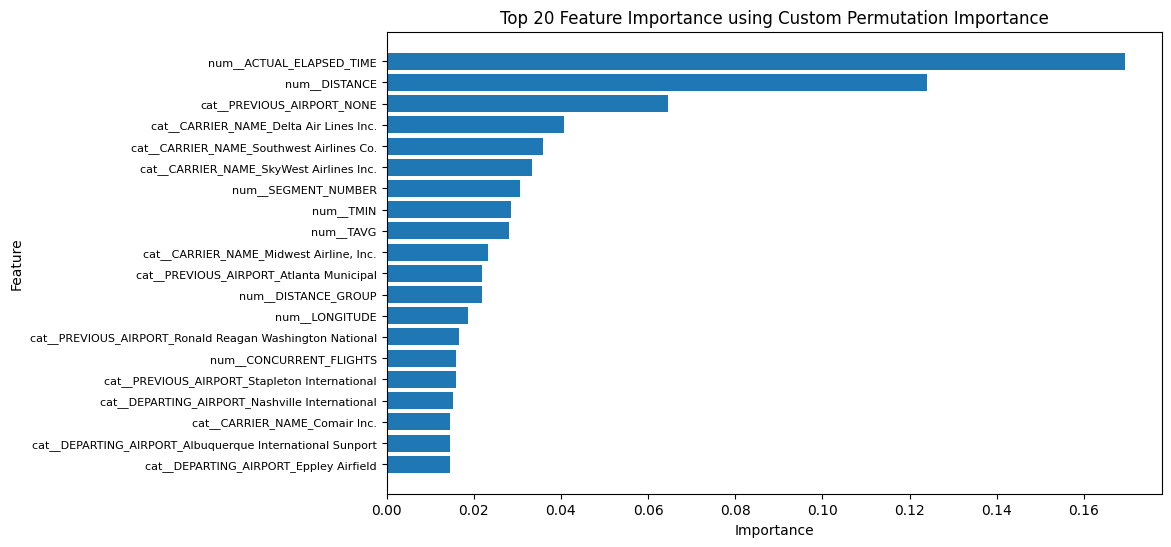

In [ ]:
# Custom Feature Importance Calculation
def custom_permutation_importance(model, X, y, n_repeats=3):
    # Predict probabilities
    y_pred_probs = model.predict(X)
    # Convert probabilities to binary predictions
    y_pred = (y_pred_probs > 0.5).astype(int)

    # Calculate the baseline accuracy
    baseline_score = accuracy_score(y, y_pred)
    importances = np.zeros(X.shape[1])

    for i in range(n_repeats):
        for col in range(X.shape[1]):
            X_permuted = X.copy()
            np.random.shuffle(X_permuted[:, col, :])  # Permute the column while maintaining the 3D shape

            # Predict on the permuted data
            y_permuted_probs = model.predict(X_permuted)
            y_permuted_pred = (y_permuted_probs > 0.5).astype(int)

            # Calculate the accuracy on permuted data
            permuted_score = accuracy_score(y, y_permuted_pred)

            # Update importance
            importances[col] += baseline_score - permuted_score

    importances /= n_repeats
    return importances


# Sample a subset of the data
sample_size = 500  # Adjust the sample size as needed
X_sample, y_sample = X_test_reshaped[:sample_size], y_test[:sample_size]

# Calculate custom permutation importance for CNN model on the sample
perm_importance = custom_permutation_importance(best_cnn_model, X_sample, y_sample)

# Number of top features to display
top_n = 20

# Sort features by importance
sorted_idx = np.argsort(perm_importance)[-top_n:]

# Plot only the top N important features
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), perm_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), preprocessor.get_feature_names_out()[sorted_idx], fontsize=8)
plt.title(f'Top {top_n} Feature Importance using Custom Permutation Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Correlation Analysis

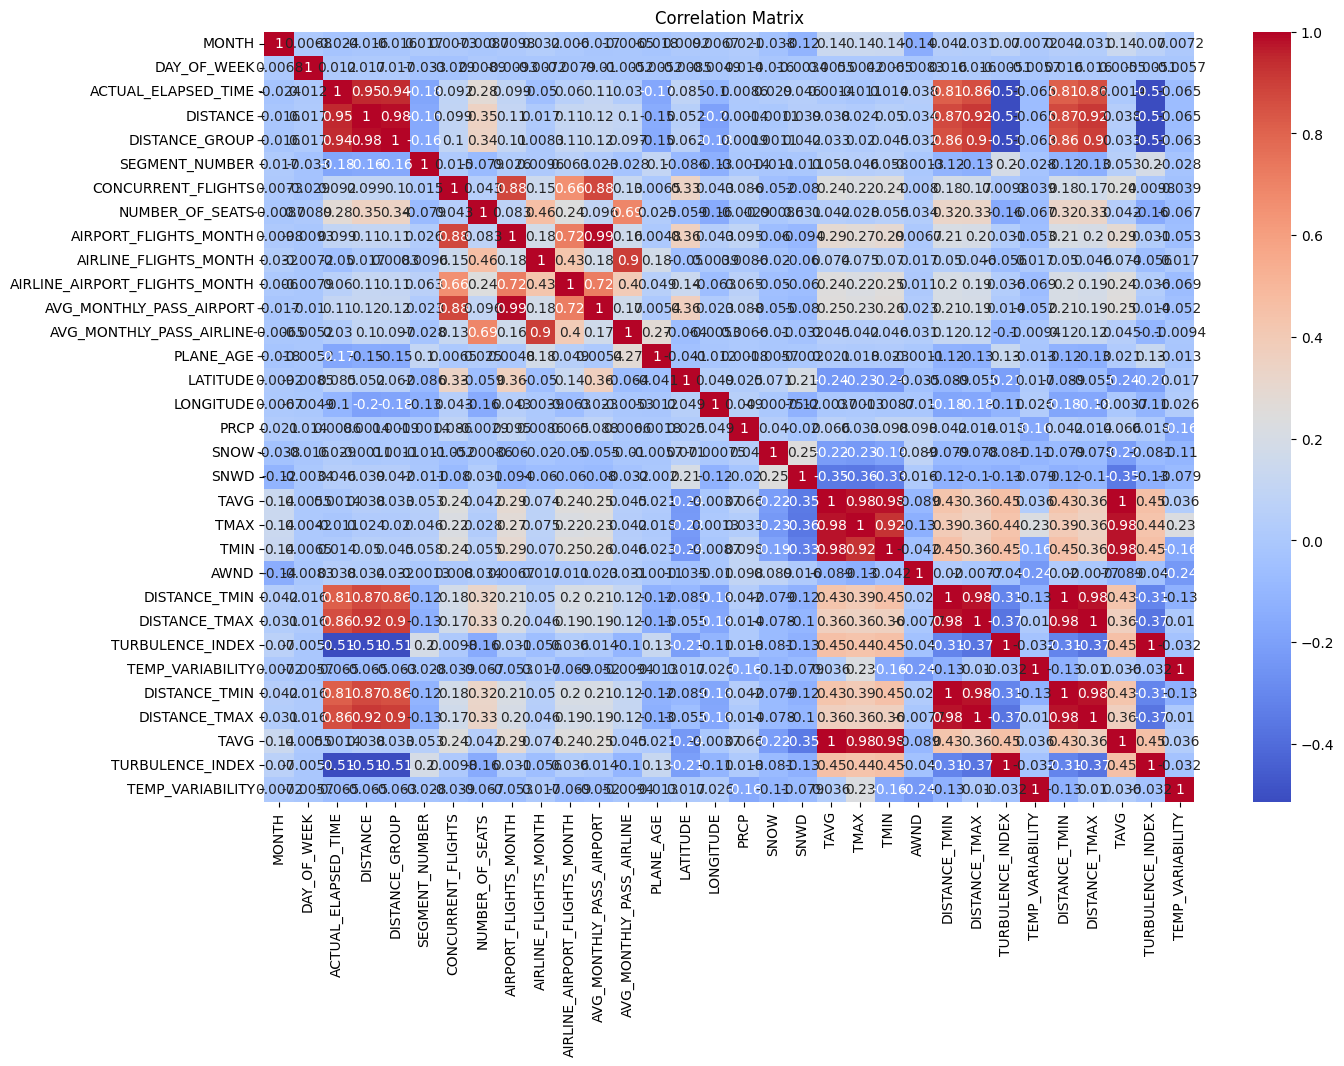

In [ ]:
# Correlation Analysis
plt.figure(figsize=(15, 10))
correlation_matrix = data[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Geographical Analysis

<ipython-input-11-b0e39ee9b496>:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


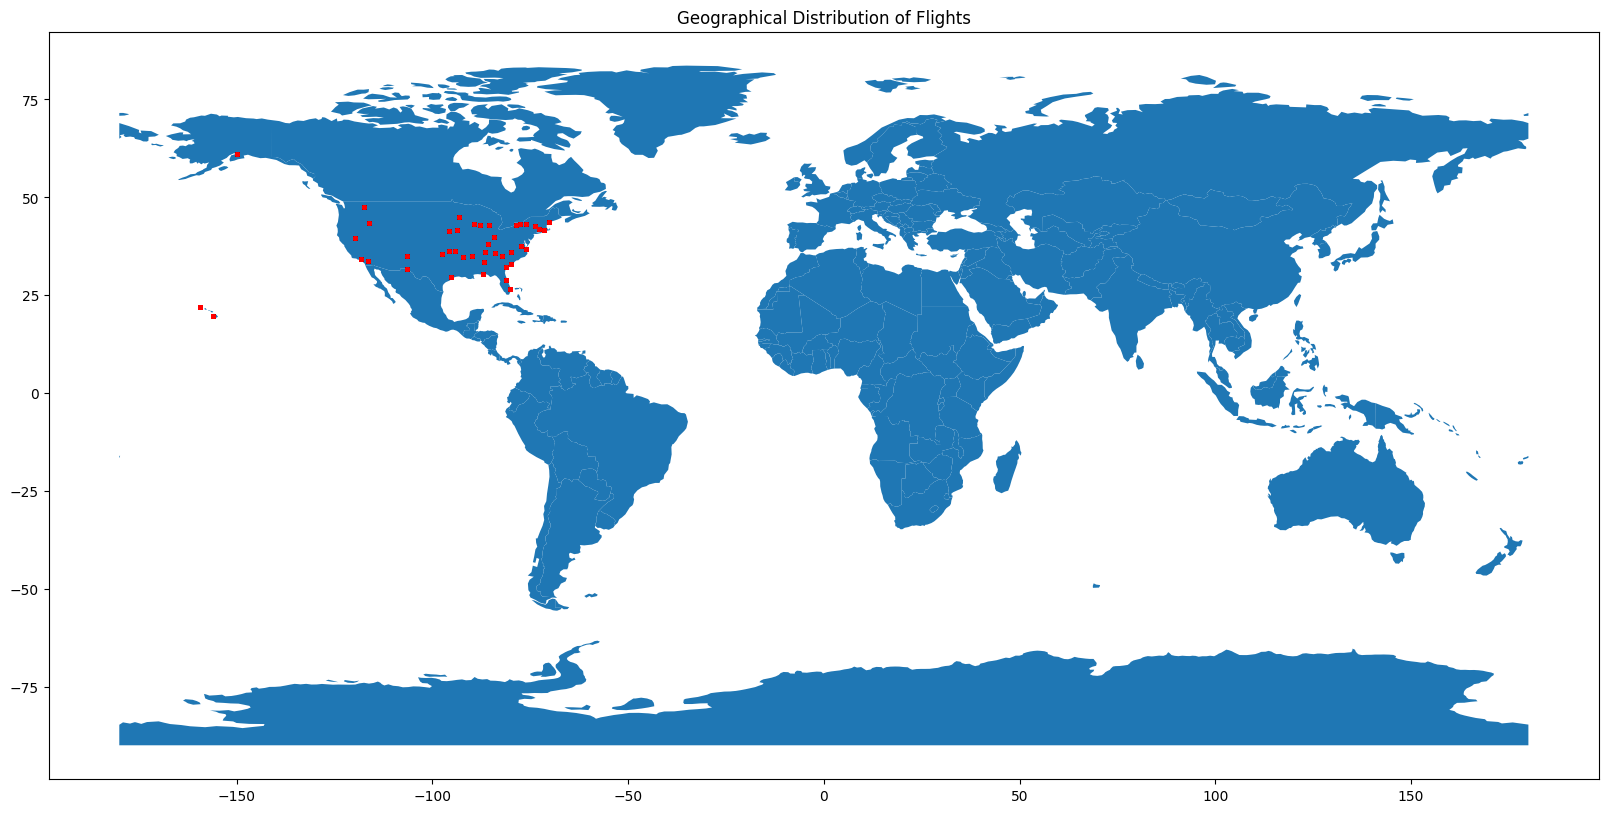

In [ ]:
# Geographical Analysis
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.LONGITUDE, data.LATITUDE))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = world.plot(figsize=(20, 10))
gdf.plot(ax=base, marker='o', color='red', markersize=5)
plt.title('Geographical Distribution of Flights')
plt.show()